In [ ]:
# copyright(c) abdulhasibuddin@gmail.com

In [1]:
import keras
#from keras.preprocessing.text import one_hot
#from keras.preprocessing.text import text_to_word_sequence
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename

Using TensorFlow backend.


In [2]:
Tk().withdraw()
#tweets_file_name = askopenfilename()
tweets_file_name = "D:/EDUCATION/Thesis - Sentiment Analysis/Twitter Bangla Collection/labelled/tweets_final_dataset_04_11_2018.txt"
print(tweets_file_name)

D:/EDUCATION/Thesis - Sentiment Analysis/Twitter Bangla Collection/labelled/tweets_final_dataset_04_11_2018.txt


In [3]:
Tk().withdraw()
#labels_file_name = askopenfilename()
labels_file_name = "D:/EDUCATION/Thesis - Sentiment Analysis/Twitter Bangla Collection/labelled/labels_final_dataset_04_11_2018.txt"
print(labels_file_name)

D:/EDUCATION/Thesis - Sentiment Analysis/Twitter Bangla Collection/labelled/labels_final_dataset_04_11_2018.txt


In [4]:
with open(tweets_file_name, 'r', encoding="utf8") as tweets_file:
    tweet_list = tweets_file.read().split('\n')
    
with open(labels_file_name, 'r', encoding="utf8") as labels_file:
    label_list = labels_file.read().split('\n')

In [5]:
for i in range(len(label_list)):
    if tweet_list[i]=='' or label_list[i]=='':
        del(tweet_list[i])
        del(label_list[i])

In [6]:
print(len(tweet_list))
print(len(label_list))

print(type(tweet_list))
print(type(tweet_list[0]))

print(tweet_list[0])
print(label_list[0])

print(tweet_list[-1])
print(label_list[-1])

1024
1024
<class 'list'>
<class 'str'>
জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদের নাই আওয়ামী লীগ নেত্রী শেখ হাসিনা এভাবে নৌকার পক্ষে ভোটে ডাকাতি করছেন লজ্জা লাগেনা ছিঃ বাসদ নেত্রী ড মনীষা চক্রবর্তী । 
simple_negative
পুষে রাখে যেমন ঝিনুক খোলসের আবরণে মুক্তোর সুখ , তেমনি তোমার গভীর ছোয়া ভেতরের এই বন্দরে , আমার ভিতর বাহিরে অন্তরে অন্তরে আছো তুমি হৃদয় জুরে এ এ এ এ 
unclassified_emotion


In [7]:
encoded_label_list = []
count_1 = 0
count_0 = 0

for label in label_list:
    #print(label)
    if label=='depressive':
        encoded_label_list.append(1)
        count_1 += 1
    else:
        encoded_label_list.append(0)
        count_0 += 1
        
print(len(encoded_label_list))
print('count_1 =',count_1)
print('count_0 =',count_0)
print(encoded_label_list[30:50])

1024
count_1 = 280
count_0 = 744
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]


In [8]:
vocabulary = {'':0}
max_tweet_length = 0

for tweet in tweet_list:
    word_list = tweet.split(' ')
    
    if max_tweet_length < len(word_list):
        max_tweet_length = len(word_list)
        
#    if len(word_list)==64:
#        print(word_list)
    
    for word in word_list:
        if word not in vocabulary.keys():
            vocabulary[word] = len(vocabulary.keys())
            
print(len(vocabulary))
print(max_tweet_length)
#print(vocabulary)

6956
64


In [9]:
### WORD LEVEL INTEGER ENCODING :: ###

In [10]:
integer_encoded_tweet_list = []
for tweet in tweet_list:
    word_list = tweet.split(' ')
    integer_encoded_tweet = [vocabulary[word] for word in word_list]
    integer_encoded_tweet_list.append(integer_encoded_tweet)
    
#    if len(integer_encoded_tweet)==64:
#        print(integer_encoded_tweet)   
    
print(len(max(integer_encoded_tweet_list, key=len)))
print(len(min(integer_encoded_tweet_list, key=len)))
print(integer_encoded_tweet_list[1:3])

64
2
[[30, 31, 32, 33, 34, 35, 36, 32, 37], [38, 39, 40, 41, 42, 43, 38, 39, 40, 41, 44, 45, 46, 47, 48]]


In [11]:
# PADDING::
for i in range(len(integer_encoded_tweet_list)):
    while len(integer_encoded_tweet_list[i]) < max_tweet_length:
        integer_encoded_tweet_list[i].append(0)
        
print(len(max(integer_encoded_tweet_list, key=len)))
print(len(min(integer_encoded_tweet_list, key=len)))
print(integer_encoded_tweet_list[1:3])

64
64
[[30, 31, 32, 33, 34, 35, 36, 32, 37, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [38, 39, 40, 41, 42, 43, 38, 39, 40, 41, 44, 45, 46, 47, 48, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [12]:
print(type(integer_encoded_tweet_list))
print(type(integer_encoded_tweet_list[0]))
print(type(integer_encoded_tweet_list[0][0]))
print(integer_encoded_tweet_list[0])

<class 'list'>
<class 'list'>
<class 'int'>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 13, 26, 27, 28, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
### ONE HOT ENCODING :: ###

In [14]:
length_padded_data = len(max(integer_encoded_tweet_list, key=len))
print(length_padded_data)

64


In [15]:
one_hot_encoded_tweet_list = []

for integer_encoded_tweet in integer_encoded_tweet_list:
    one_hot_encoded_tweet = []
    for integer_encoded_word in integer_encoded_tweet:
        for index in range(length_padded_data):
            if index == integer_encoded_word:
                one_hot_encoded_tweet.append(1)
            else:
                one_hot_encoded_tweet.append(0)
    
    one_hot_encoded_tweet_list.append(one_hot_encoded_tweet)

In [16]:
print(type(one_hot_encoded_tweet_list))
print(type(one_hot_encoded_tweet_list[0]))
print(type(one_hot_encoded_tweet_list[0][0]))

print(len(one_hot_encoded_tweet_list))
print('Length of each tweet =',length_padded_data)
print('Length of each word in a one hot encoded tweet = Length of each tweet =',length_padded_data)
print('len(one_hot_encoded_tweet_list[0])=('+str(length_padded_data)+'x'+str(length_padded_data)+')='+str(len(one_hot_encoded_tweet_list[0])))
#print(len(one_hot_encoded_tweet_list[0][0]))

#print(one_hot_encoded_tweet_list[0][0])
print(one_hot_encoded_tweet_list[0])

<class 'list'>
<class 'list'>
<class 'int'>
1024
Length of each tweet = 64
Length of each word in a one hot encoded tweet = Length of each tweet = 64
len(one_hot_encoded_tweet_list[0])=(64x64)=4096
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [17]:
### DEFINE FINAL DATASET AND CORRESPONDING LABELSET :: ###

In [18]:
final_dataset = integer_encoded_tweet_list
#final_dataset = one_hot_encoded_tweet_list
final_labelset = encoded_label_list

print('len(final_dataset) =',len(final_dataset))
print('len(final_labelset) =',len(final_labelset))

len(final_dataset) = 1024
len(final_labelset) = 1024


In [19]:
units = len(integer_encoded_tweet_list[0])
embedding_dim = len(integer_encoded_tweet_list[0])
input_shape = len(integer_encoded_tweet_list[0])

#units = len(one_hot_encoded_tweet_list[0])
#embedding_dim = len(one_hot_encoded_tweet_list[0])
#input_shape = len(one_hot_encoded_tweet_list[0])

In [20]:
model = Sequential()

In [21]:
model.add(Embedding(units, 
                    embedding_dim,
                    input_shape=(input_shape,)))

In [22]:
model.add(GRU(512, 
              activation='tanh', 
              use_bias=True, 
              bias_initializer='RandomNormal', 
              dropout=0.2, 
              return_sequences=True))

In [23]:
model.add(GRU(512, 
              activation='tanh', 
              use_bias=True, 
              bias_initializer='RandomNormal', 
              dropout=0.2, 
              return_sequences=True))

In [24]:
model.add(GRU(2, 
              activation='softmax', 
              use_bias=True, 
              bias_initializer='RandomNormal', 
              dropout=0.2))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 64, 64)            4096      
_________________________________________________________________
gru_1 (GRU)                  (None, 64, 512)           886272    
_________________________________________________________________
gru_2 (GRU)                  (None, 64, 512)           1574400   
_________________________________________________________________
gru_3 (GRU)                  (None, 2)                 3090      
Total params: 2,467,858
Trainable params: 2,467,858
Non-trainable params: 0
_________________________________________________________________


In [26]:
plot_model(model, to_file='D:\EDUCATION\Machine & Deep Learning\Jupyter Notebook\Images\model.pdf')

In [27]:
batch_size = 500
epochs = 4
k = 3
learning_rate = 0.1
learning_rate_decay = 1e-6

In [28]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=SGD(lr=learning_rate,
                           decay=learning_rate_decay
                          ),
             metrics=['accuracy'])

In [29]:
dataset_split_index = int(len(final_dataset)*0.1)

training_validation_dataset = final_dataset[dataset_split_index:]
testing_dataset = final_dataset[:dataset_split_index]

training_validation_labelset = final_labelset[dataset_split_index:]
testing_labelset = final_labelset[:dataset_split_index]

print(dataset_split_index)

print('len(training_validation_dataset) =',len(training_validation_dataset))
print('len(training_validation_labelset) =',len(training_validation_labelset))

print('len(testing_dataset) =',len(testing_dataset))
print('len(testing_labelset)',len(testing_labelset))

102
len(training_validation_dataset) = 922
len(training_validation_labelset) = 922
len(testing_dataset) = 102
len(testing_labelset) 102


In [30]:
total_data = len(integer_encoded_tweet_list)
split_indices = int(total_data/k)

print(total_data)

1024


In [31]:
training_loss = []
training_acc = []
validation_loss = []
validation_acc = []

for fold in range(1,k+1):
    print('Fold -',fold,'::')
    print('--------------')
    
    training_dataset = training_validation_dataset[:fold*split_indices-split_indices]
    training_dataset += training_validation_dataset[fold*split_indices:]
    validation_dataset = training_validation_dataset[fold*split_indices-split_indices:fold*split_indices]
    
    training_labelset = training_validation_labelset[:fold*split_indices-split_indices]
    training_labelset += training_validation_labelset[fold*split_indices:]
    validation_labelset = training_validation_labelset[fold*split_indices-split_indices:fold*split_indices]
    
    #print(len(training_dataset))
    #print(len(training_dataset[0]))
    #print(type(training_dataset[0][0]))
    
    print('Training on',len(training_dataset),'samples & validating on',len(validation_dataset),'samples with batch size',batch_size,'.')
    
    training_history = model.fit(np.array(training_dataset),
                                 np.array(training_labelset),
                                 batch_size=batch_size,
                                 epochs=epochs,
                                 #validation_split=0.1
                                )
    #training_history.append(current_training_history)
    for loss in training_history.history['loss']:
        training_loss.append(loss)
    for acc in training_history.history['acc']:
        training_acc.append(acc)
    
    print('\nValidating...')
    validation_history = model.evaluate(np.array(validation_dataset),
                                        np.array(validation_labelset),
                                        batch_size=None, 
                                       )
    #validation_history.append(current_validation_history)
    validation_loss.append(validation_history[0])
    validation_acc.append(validation_history[1])
    print('Validation loss:',validation_history[0],', Validation acc:',validation_history[1])
    
    print('--------------\n')

Fold - 1 ::
--------------
581
64
Training on 581 samples & validating on 341 samples with batch size 500 .
Epoch 1/4
581/581 [==============================] - 9s 15ms/step - loss: 0.6966 - acc: 0.3907
Epoch 2/4
581/581 [==============================] - 5s 8ms/step - loss: 0.6054 - acc: 0.7263
Epoch 3/4
581/581 [==============================] - 5s 8ms/step - loss: 0.5905 - acc: 0.7263
Epoch 4/4
581/581 [==============================] - 5s 8ms/step - loss: 0.5931 - acc: 0.7263

Validating...
341/341 [==============================] - 3s 8ms/step
Validation loss: 0.5863779377727565 , Validation acc: 0.7272727276223147
--------------

Fold - 2 ::
--------------
581
64
Training on 581 samples & validating on 341 samples with batch size 500 .
Epoch 1/4
581/581 [==============================] - 5s 8ms/step - loss: 0.5797 - acc: 0.7315
Epoch 2/4
581/581 [==============================] - 5s 8ms/step - loss: 0.5819 - acc: 0.7315
Epoch 3/4
581/581 [==============================] - 5s 8ms/

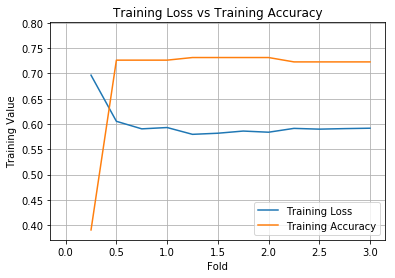

In [32]:
x_axis = [x/epochs for x in range(1,epochs*k+1)]

plt.grid()
plt.plot(x_axis, training_loss)
plt.plot(x_axis, training_acc)
plt.plot([0,k], [min(training_loss),max(training_acc)+.05], alpha=0.0)
plt.title('Training Loss vs Training Accuracy')
plt.ylabel('Training Value')
plt.xlabel('Fold')
plt.legend(['Training Loss', 'Training Accuracy'], loc='best')
plt.show()

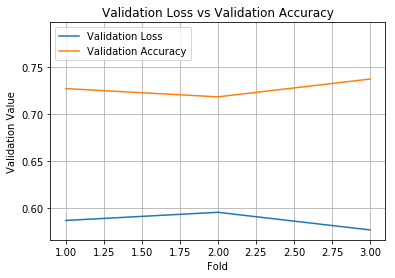

In [47]:
x_axis = [x for x in range(1,k+1)]

plt.grid()
plt.plot(x_axis, validation_loss)
plt.plot(x_axis, validation_acc)
plt.plot([1,k], [min(validation_loss),max(validation_acc)+.05], alpha=0.0)
plt.title('Validation Loss vs Validation Accuracy')
plt.ylabel('Validation Value')
plt.xlabel('Fold')
plt.legend(['Validation Loss', 'Validation Accuracy'], loc='best')
plt.show()

In [34]:
### TESTING :: ###

In [35]:
testing_result = model.predict_classes(np.array(testing_dataset))

In [36]:
accuracy_count = 0
for target,predicted in zip(testing_labelset,testing_result):
    if target == predicted:
        accuracy_count += 1

In [37]:
print(accuracy_count,'out of',len(testing_labelset),'testing samples are correctly classified!')
accuracy = round(((accuracy_count/len(testing_labelset))*100), 2)
print('Accuracy = '+str(accuracy)+'%')

74 out of 102 testing samples are correctly classified!
Accuracy = 72.55%


In [38]:
### SOME NOTES:-

In [39]:
#print(training_history.epoch)
print(training_history.history)
print(training_history.history['loss'])
print(training_history.history['acc'])
#print(training_history.model)

{'loss': [0.5914404617726279, 0.5899179425756952, 0.5909863588047867, 0.5917728576492355], 'acc': [0.7228738861349671, 0.7228738800171883, 0.7228739106060822, 0.7228739114800506]}
[0.5914404617726279, 0.5899179425756952, 0.5909863588047867, 0.5917728576492355]
[0.7228738861349671, 0.7228738800171883, 0.7228739106060822, 0.7228739114800506]


In [40]:
print(validation_history)
print(validation_history[0])
print(validation_history[1])
#print(validation_history.count)

[0.5762793938318889, 0.7375]
0.5762793938318889
0.7375


In [41]:
print(training_loss)
print(training_acc)
print('validation_loss =',validation_loss)
print(validation_acc)

print(max(training_acc))
print(min(training_loss))

print(max(validation_acc))
print('min(validation_loss) =',min(validation_loss))

print(len(training_loss))

[0.6966254530593163, 0.6054173268877906, 0.5905174346265613, 0.5931132588657373, 0.5796593466642186, 0.5818502812705639, 0.5861447766397578, 0.5838533236730119, 0.5914404617726279, 0.5899179425756952, 0.5909863588047867, 0.5917728576492355]
[0.3907056781182806, 0.7263338930020029, 0.7263339117759271, 0.7263338839741048, 0.731497410139816, 0.7314974305551762, 0.7314974215272781, 0.7314974403012025, 0.7228738861349671, 0.7228738800171883, 0.7228739106060822, 0.7228739114800506]
validation_loss = [0.5863779377727565, 0.595106505578564, 0.5762793938318889]
[0.7272727276223147, 0.7184750740129577, 0.7375]
0.7314974403012025
0.5796593466642186
0.7375
min(validation_loss) = 0.5762793938318889
12


In [42]:
'''
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()
'''

"\nplt.plot(training_loss)\nplt.plot(validation_loss)\nplt.title('Training Loss vs Validation Loss')\nplt.ylabel('Loss')\nplt.xlabel('Epoch')\nplt.legend(['Training Loss', 'Validation Loss'], loc='upper left')\nplt.show()\n"

In [43]:
5/3
round(5/3, 2)

1.67

In [44]:
x_axis = [round(x/len(training_loss), 2) for x in range(1,len(training_loss)+1)]
print(x_axis)

x_axis = [x for x in range(epochs*k+1)]
print(x_axis)

x_axis = [x/epochs for x in range(epochs*k+1)]
print(x_axis)

x_axis = [x/epochs for x in range(epochs*k+1)]
print(x_axis)

y_axis = [y for y in training_loss]
y_axis.append(1)
print(y_axis)

[0.08, 0.17, 0.25, 0.33, 0.42, 0.5, 0.58, 0.67, 0.75, 0.83, 0.92, 1.0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
[0.6966254530593163, 0.6054173268877906, 0.5905174346265613, 0.5931132588657373, 0.5796593466642186, 0.5818502812705639, 0.5861447766397578, 0.5838533236730119, 0.5914404617726279, 0.5899179425756952, 0.5909863588047867, 0.5917728576492355, 1]


In [45]:
x=10
[x,11]

[10, 11]